In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import os

2023-07-01 16:08:37.902379: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
batch_size = 8
img_height = 184
img_width = 216
img_size = (img_height, img_width)
img_shape = img_size + (3,)

ds_path = "/drive0-storage/Gracia/dataset_1"
with tf.device("CPU"):
    train_ds = image_dataset_from_directory(ds_path,
                                            seed = 123,
                                            image_size = img_size,
                                            batch_size = batch_size)

## display image & size

(182, 218)


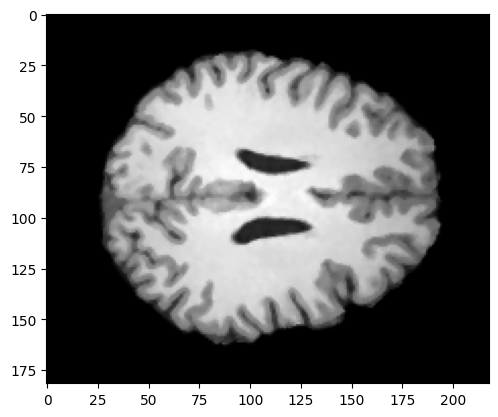

In [6]:
test = plt.imread("/drive0-storage/Gracia/dataset_1/bipolar_disorder/60001_100.png")
plt.imshow(test, cmap='gray')
print(test.shape)

## resize, convert to rgb

(184, 216)


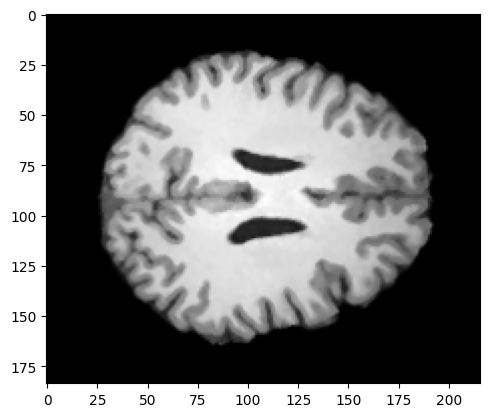

In [13]:
image = Image.open("/drive0-storage/Gracia/dataset_1/bipolar_disorder/60001_100.png")
new_image = image.resize((216, 184))
new_image = np.array(new_image)
print(new_image.shape)
plt.imshow(new_image, cmap='gray');

(184, 216, 3)


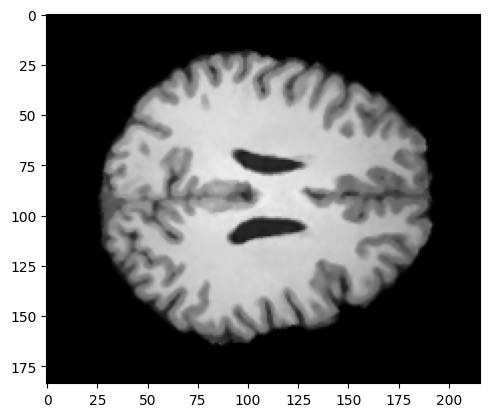

In [15]:
test_rgb = np.stack((new_image,new_image,new_image), axis=2)
print(test_rgb.shape)
plt.imshow(test_rgb, cmap='gray')

## Loaded Dataset

In [6]:
def preprocess(image, label):
    image = tf.image.rgb_to_grayscale(image)
    image = (image-127.5)/127.5
    return image

<dtype: 'float32'>
0.0 242.39185
(184, 216, 3)


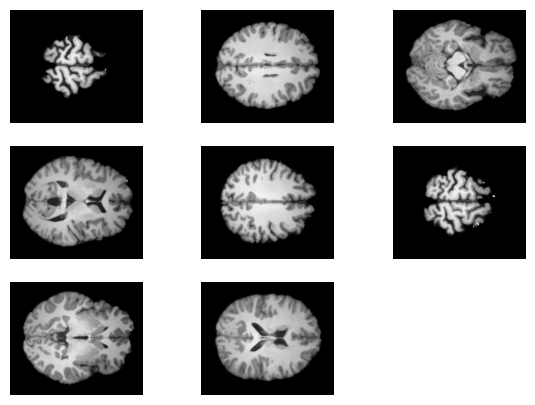

In [27]:
plt.figure(figsize=(7,5))
for images, labels in train_ds.take(1):
    org_image = images[0]
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        
print(org_image.dtype)
print(np.min(org_image), np.max(org_image))
print(org_image.shape)

## Processed dataset

<dtype: 'float32'>
-1.0 0.93706113
(184, 216, 1)


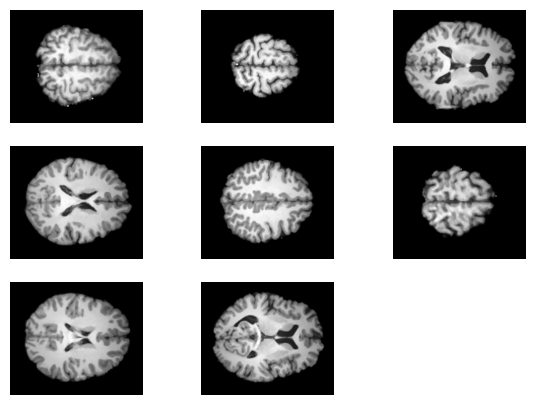

In [29]:
plt.figure(figsize=(7,5))
for images in train_dataset.take(1):
    proc_img = images[0]
    for i in range(8):
        sample = images[i]
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(sample, cmap='gray')
        plt.axis("off")
        
print(proc_img.dtype)
print(np.min(proc_img), np.max(proc_img))
print(proc_img.shape)

open image

In [91]:
im = PIL.Image.open(r"test/tes_hc0.png") 
# im = PIL.Image.open(r"dataset/hc/healthy_controls/11156_99.png") 
im = np.array(im)
print(im.dtype)
print(im.shape)
print(im.min(), im.max())

uint8
(184, 216)
0 241
